In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def show(org, new):
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(org)
    axs[0].set_title('orgImg')
    axs[1].imshow(new)
    axs[1].set_title('newImg')

    for ax in axs:
        ax.set_xticks([])
        ax.set_yticks([])

    plt.tight_layout()
    plt.show()


def show1G(org, new):
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(org)
    axs[0].set_title('orgImg')
    axs[1].imshow(new, cmap='Greys')
    axs[1].set_title('newImg')

    for ax in axs:
        ax.set_xticks([])
        ax.set_yticks([])

    plt.tight_layout()
    plt.show()


def show2G(org, new):
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(org, cmap='Greys')
    axs[0].set_title('orgImg')
    axs[1].imshow(new, cmap='Greys')
    axs[1].set_title('newImg')

    for ax in axs:
        ax.set_xticks([])
        ax.set_yticks([])

    plt.tight_layout()
    plt.show()

In [29]:
# img = cv2.imread('diseasePrediction/test_data/AppleCedarRust2.jpg')
# img = cv2.imread('diseasePrediction/test_data/AppleScab1.jpg')
img = cv2.imread('diseasePrediction/test_data/PotatoEarlyBlight1.jpg')

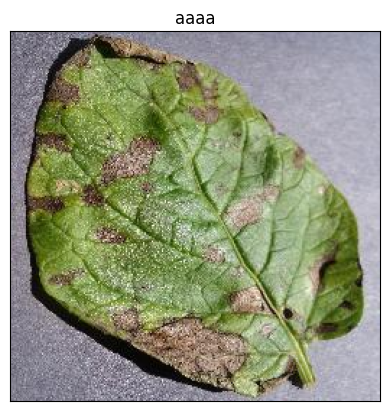

In [30]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.xticks([])
plt.yticks([])
plt.title('aaaa')
plt.show()

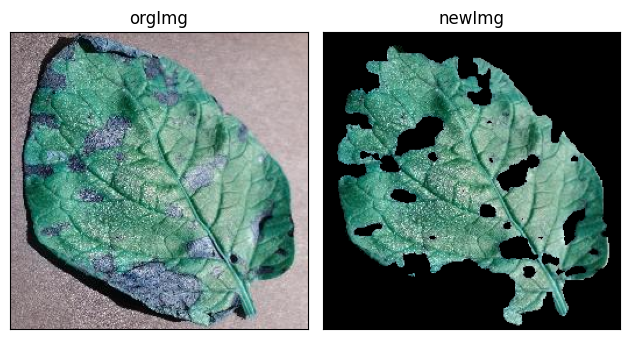

In [31]:
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

a_channel = lab[:,:,1]
_, th = cv2.threshold(a_channel,127,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
masked  = cv2.bitwise_and(img, img, mask = th)

show(img, masked)

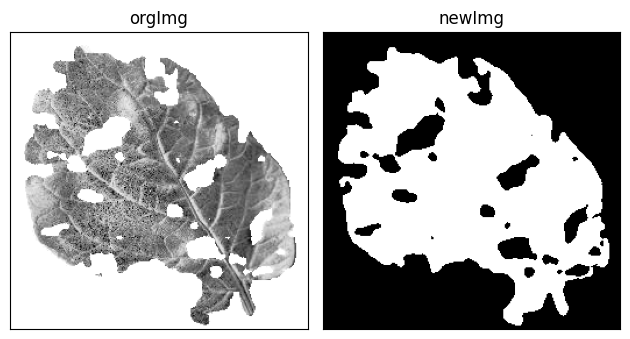

In [32]:
grey = cv2.cvtColor(masked, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(grey, (5, 5), cv2.BORDER_DEFAULT)
_, thresh = cv2.threshold(blur, 200, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
show2G(grey, thresh)

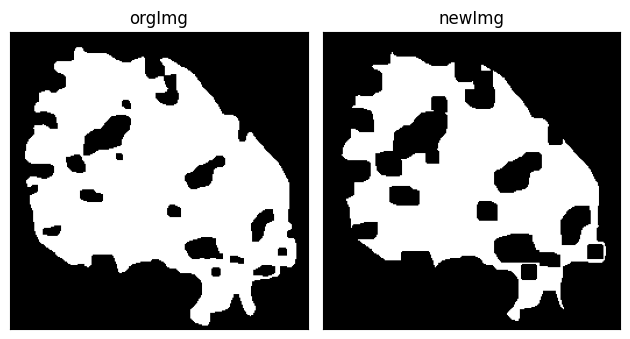

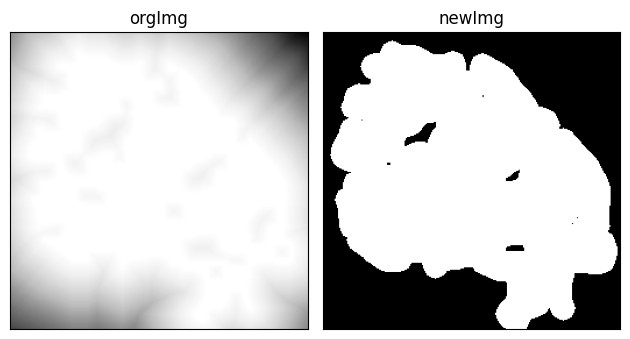

In [33]:
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
sure_bg = cv2.dilate(opening, kernel, iterations=3)
show2G(opening, sure_bg)

dist_transform = cv2.distanceTransform(sure_bg, cv2.DIST_L2, 3)
ret, sure_fg = cv2.threshold(dist_transform, 0.1*dist_transform.max(), 255, 0)
show2G(dist_transform, sure_fg)

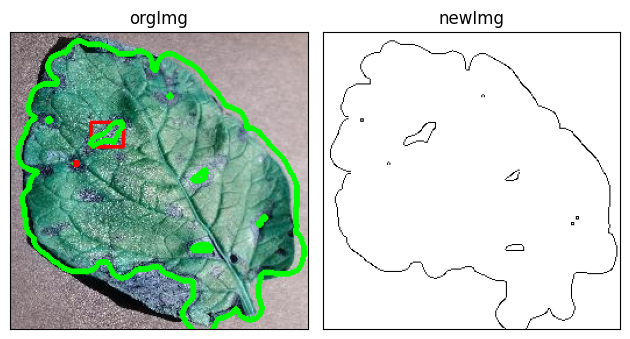

In [40]:
edges = cv2.Canny(np.uint8(sure_fg), 50, 100)
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(img, contours, -1, (0, 255, 0), 3)
#c = max(contours, key = cv2.contourArea)
c = min(contours, key=cv2.contourArea)
x,y,w,h = cv2.boundingRect(c)

cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
show1G(img, edges)